<a href="https://colab.research.google.com/github/Guhan2348519/ADVANCED-ML-tasks/blob/main/2348519_tree_logistic_regrssion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Social_Network_Ads.csv')

In [ ]:
data.head

<bound method NDFrame.head of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [ ]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

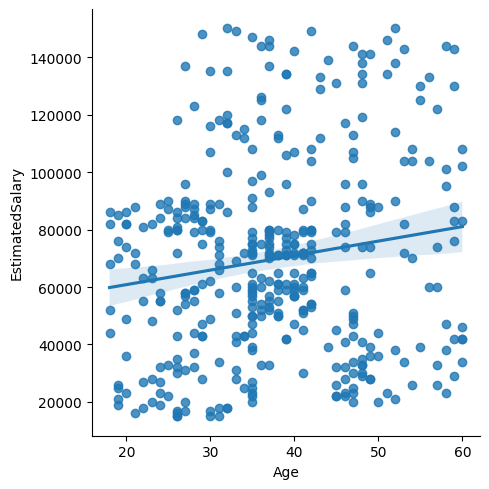

In [ ]:
sns.lmplot(x = "Age", y = "EstimatedSalary", data = data)

<ipython-input-59-e470e43627cc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


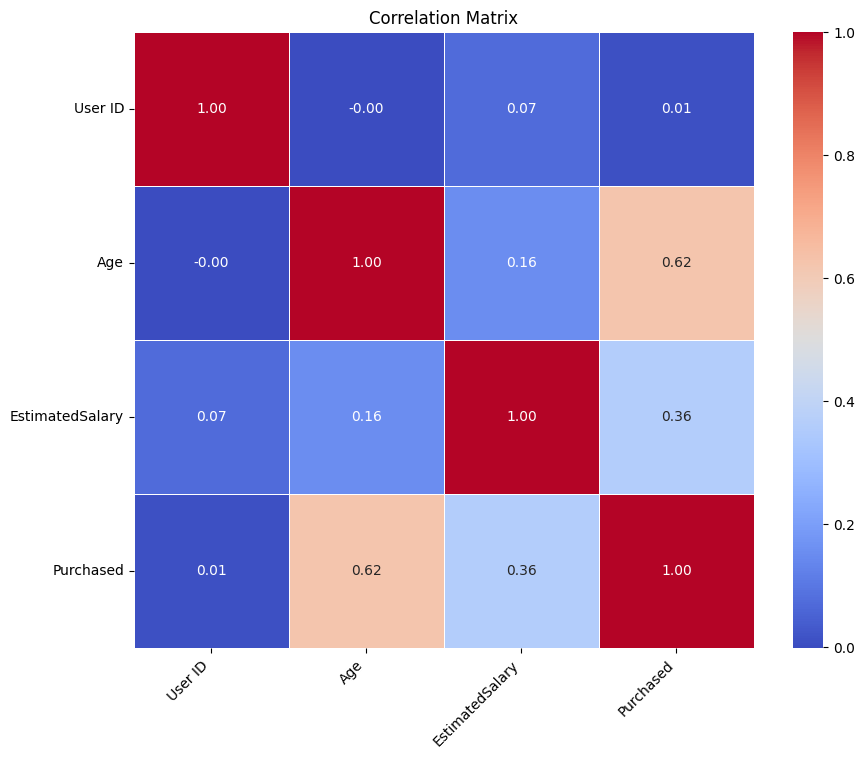

In [ ]:
correlation_matrix = data.corr()

# Plot the correlation matrix with modified axis labels
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels as they are
plt.show()

In [ ]:
data.describe()

User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000

In [ ]:

x = data.drop('Purchased', axis=1)
y = data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:

# Encode categorical variables (e.g., Gender) using get_dummies
X_train_encoded = pd.get_dummies(X_train, columns=['Gender'])
X_test_encoded = pd.get_dummies(X_test, columns=['Gender'])

In [ ]:
# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

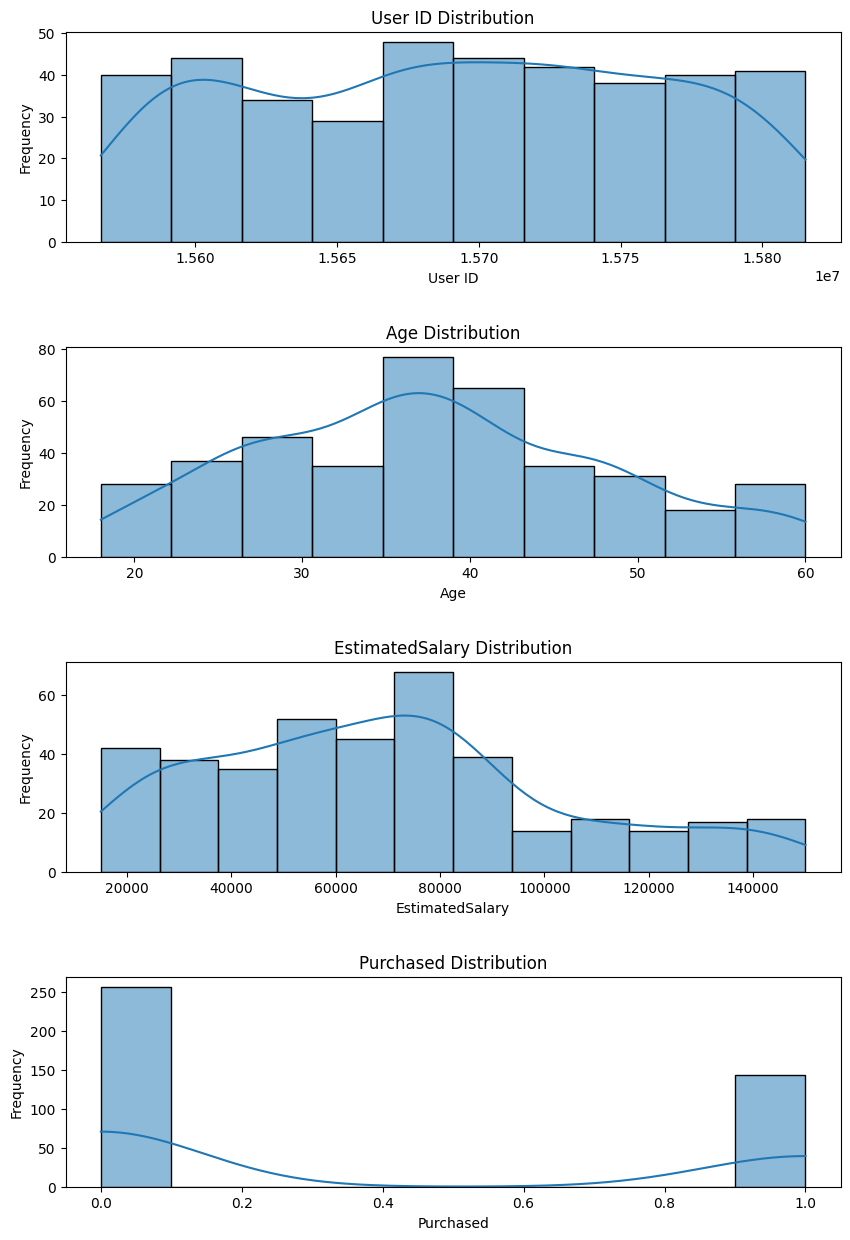

In [86]:
numerical_features = data.select_dtypes(exclude=['object']).columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(10, 15))
fig.subplots_adjust(hspace=0.5)

for feature, ax in zip(numerical_features, axes):
    sns.histplot(data[feature], kde=True, ax=ax)
    ax.set_title(f"{feature} Distribution")
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")

plt.show()

In [ ]:

# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:

# Make predictions on the training set
y_pred_train = logistic_model.predict(X_train_scaled)

# Evaluate the model on the testing set
y_pred_test = logistic_model.predict(X_test_scaled)

In [ ]:

# Calculate accuracy and print classification report for the testing set
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.8875
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



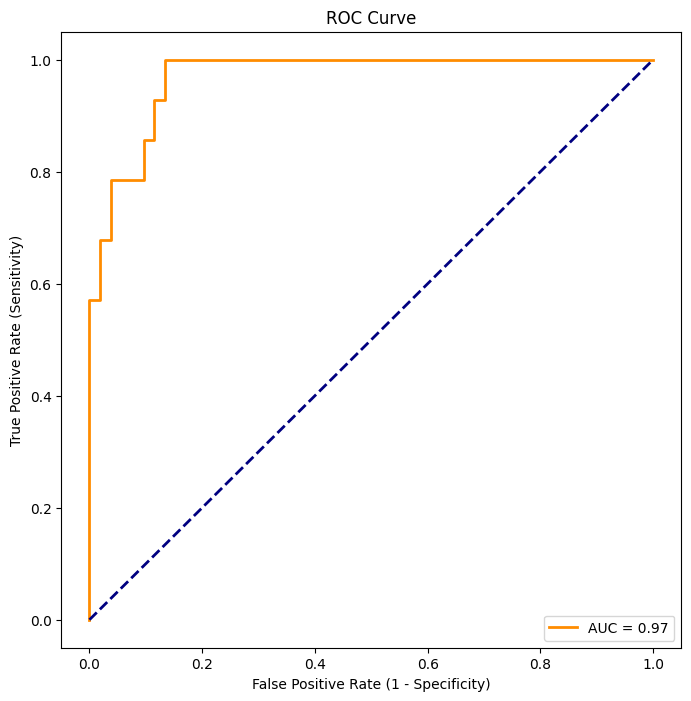

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.tree import export_text

In [ ]:
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
plt.figure(figsize=(200,300 ))
plot_tree(tree_regressor, feature_names=X_train_encoded.columns.tolist(), filled=True, rounded=True, fontsize=40)
plt.title("Decision Tree Regression", fontsize=24)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error, r2_score
y_pred_test_tree = tree_regressor.predict(X_test_scaled)

# Evaluate Decision Tree Regression model
mse_tree = mean_squared_error(y_test, y_pred_test_tree)
mae_tree = mean_absolute_error(y_test, y_pred_test_tree)
r2_tree = r2_score(y_test, y_pred_test_tree)

print("\nDecision Tree Regression Metrics:")
print(f"Mean Squared Error: {mse_tree}")
print(f"Mean Absolute Error: {mae_tree}")
print(f"R-squared: {r2_tree}")


Decision Tree Regression Metrics:
Mean Squared Error: 0.1125
Mean Absolute Error: 0.1125
R-squared: 0.5054945054945056
